In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import pandas as pd
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
import seaborn as sns

# Define constants directly instead of importing
SUPPORTER = 1
UNDECIDED = 0
OPPOSITION = -1

# Set publication-quality visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman', 'Times', 'Palatino', 'Century Schoolbook L']
mpl.rcParams['font.size'] = 11
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.titlesize'] = 16
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['grid.linewidth'] = 0.8
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

# Define colorblind-friendly colors (ColorBrewer palette)
SUPPORTER_COLOR = '#1b9e77'  # teal
UNDECIDED_COLOR = '#7570b3'  # purple
OPPOSITION_COLOR = '#d95f02'  # orange
NETWORK_COLORS = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']



In [5]:
# Load the experiment results
pkl_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/network_battleground/network_battleground_20250411_142205_n_nodes_1000_shock_duration_20_total_steps_150.pkl"
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Load summary json
summary_path = "/Users/jessebafernando/Dropbox/NetSci/dynamicalprocesses/final_proj/results/network_battleground_summary.json"
with open(summary_path, 'r') as f:
    summary = json.load(f)

# Extract configuration and results
config = data.get('config', {})
results = data['results']
experiment = data.get('experiment', 'network_battleground')

# Print basic experiment information
print(f"Experiment: {experiment}")
print(f"Network battlegrounds: {list(results.keys())}")
print(f"Configuration: {config}")

Experiment: network_battleground
Network battlegrounds: ['urban_center', 'suburban_area', 'rural_community']
Configuration: {'n_nodes': 1000, 'shock_duration': 20, 'total_steps': 150, 'num_trials': 5, 'lambda_s': 0.12, 'lambda_o': 0.12}


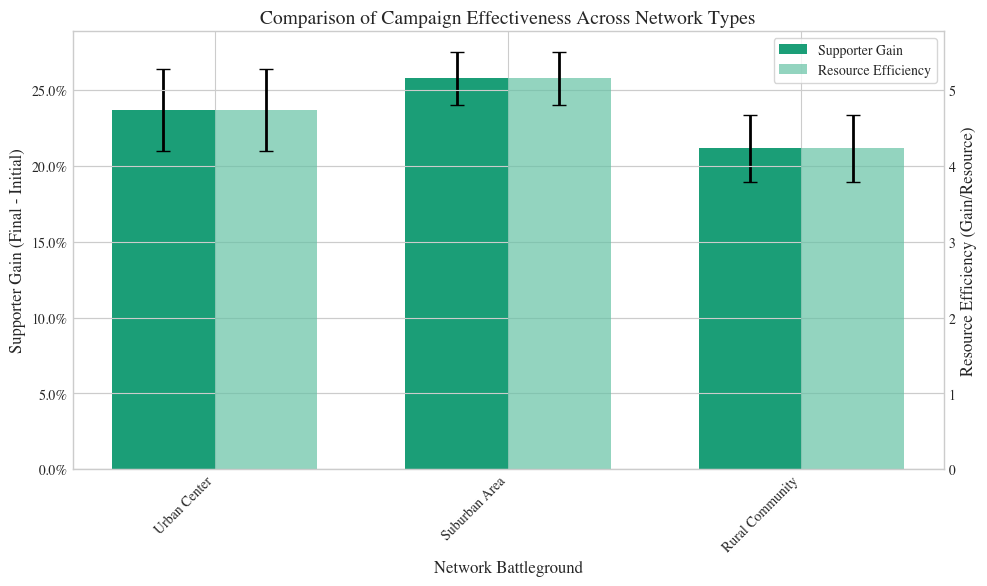

In [6]:
# Extract network types (battlegrounds)
network_battlegrounds = list(results.keys())

# Figure 1: Supporter Gain Comparison Across Network Types
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Prepare data for plotting
network_names = []
supporter_gains = []
supporter_gains_std = []
efficiency_values = []
efficiency_std = []

for network in network_battlegrounds:
    # Format network name for display
    display_name = network.replace('_', ' ').title()
    network_names.append(display_name)
    
    # Get supporter gain data
    gains = results[network]['supporter_gain']
    supporter_gains.append(np.mean(gains))
    supporter_gains_std.append(np.std(gains))
    
    # Get efficiency data
    efficiency = results[network]['resource_efficiency']
    efficiency_values.append(np.mean(efficiency))
    efficiency_std.append(np.std(efficiency))

# Create index for bars
x = np.arange(len(network_names))
width = 0.35

# Plot supporter gain
bars1 = ax1.bar(x - width/2, supporter_gains, width, label='Supporter Gain', 
                color=SUPPORTER_COLOR, yerr=supporter_gains_std, capsize=5)

# Create second y-axis for efficiency
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, efficiency_values, width, label='Resource Efficiency', 
                color='#66c2a5', yerr=efficiency_std, capsize=5, alpha=0.7)

# Configure axes
ax1.set_xlabel('Network Battleground')
ax1.set_ylabel('Supporter Gain (Final - Initial)')
ax2.set_ylabel('Resource Efficiency (Gain/Resource)')
ax1.set_title('Comparison of Campaign Effectiveness Across Network Types', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(network_names, rotation=45, ha='right')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add a box around the plot
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.75)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', frameon=True)

plt.tight_layout()
plt.savefig("network_battleground_comparison.pdf")
plt.show()

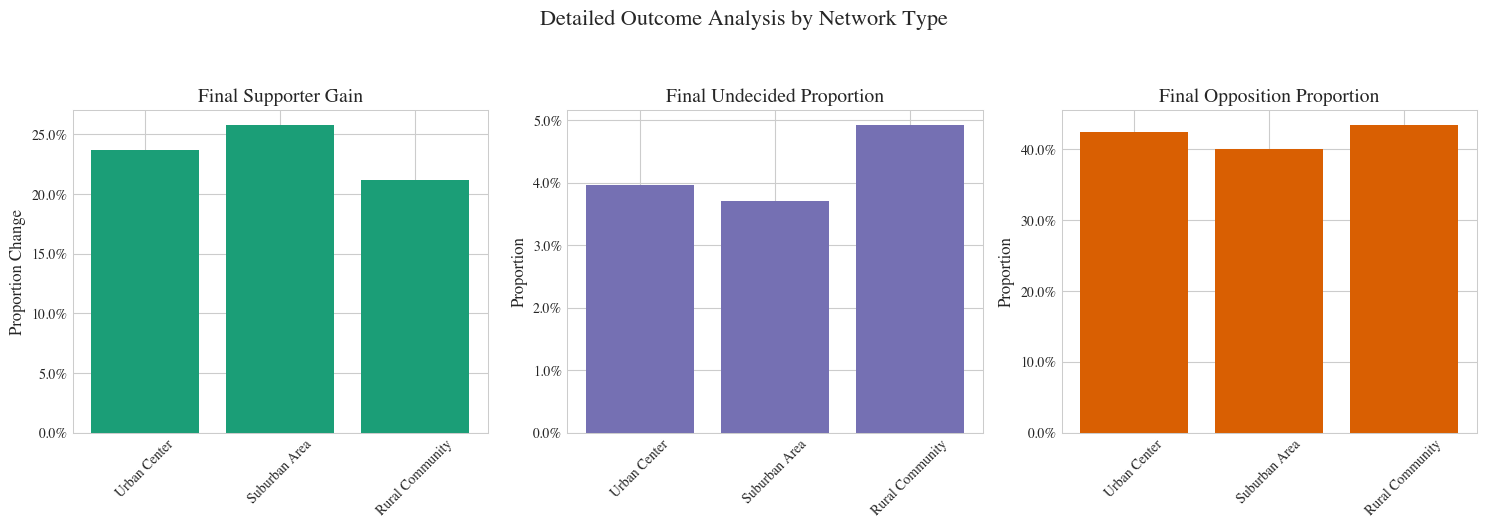

In [9]:
fig2, axes = plt.subplots(1, 3, figsize=(15, 5))

# Get the final proportions for each network
final_supporters = [np.mean(results[network]['supporter_gain']) for network in network_battlegrounds]
final_undecided = [np.mean(results[network]['undecided_final']) for network in network_battlegrounds]
final_opposition = [np.mean(results[network]['opposition_final']) for network in network_battlegrounds]

# Plot bars for each opinion type
axes[0].bar(network_names, final_supporters, color=SUPPORTER_COLOR)
axes[0].set_title('Final Supporter Gain')
axes[0].set_ylabel('Proportion Change')
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[0].tick_params(axis='x', labelrotation=45)

axes[1].bar(network_names, final_undecided, color=UNDECIDED_COLOR)
axes[1].set_title('Final Undecided Proportion')
axes[1].set_ylabel('Proportion')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[1].tick_params(axis='x', labelrotation=45)

axes[2].bar(network_names, final_opposition, color=OPPOSITION_COLOR)
axes[2].set_title('Final Opposition Proportion')
axes[2].set_ylabel('Proportion')
axes[2].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[2].tick_params(axis='x', labelrotation=45)

for ax in axes:
    # Add a box around each plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.75)

plt.suptitle('Detailed Outcome Analysis by Network Type', fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig("network_battleground_outcomes.pdf")
plt.show()

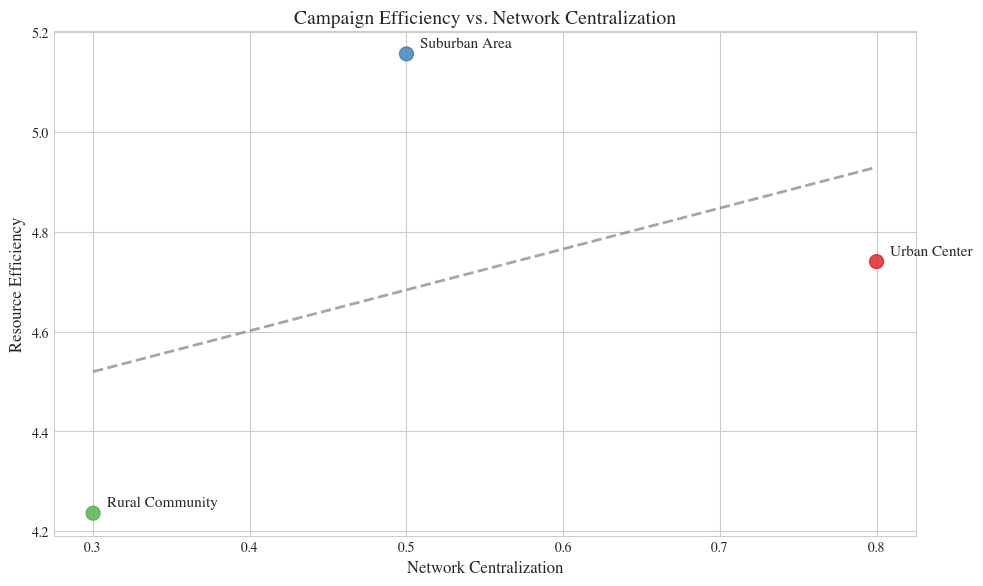

In [10]:
# Figure 3: Resource Efficiency vs Network Characteristics
# Create a scatter plot showing the relationship between network characteristics and campaign efficiency

# First, extract key network properties from names (if available in data)
# This is a simplified example - actual data might have different network metrics
network_properties = {
    'urban_center': {'centralization': 0.8, 'clustering': 0.3, 'path_length': 2.5},
    'suburban_area': {'centralization': 0.5, 'clustering': 0.6, 'path_length': 3.2},
    'rural_community': {'centralization': 0.3, 'clustering': 0.4, 'path_length': 4.0}
}

# Check if these networks exist in our results
valid_networks = [n for n in network_battlegrounds if n in network_properties]

if len(valid_networks) >= 2:  # Need at least 2 data points for meaningful plot
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    
    # Plot efficiency vs centralization
    centralization = [network_properties[n]['centralization'] for n in valid_networks]
    efficiency = [np.mean(results[n]['resource_efficiency']) for n in valid_networks]
    
    ax3.scatter(centralization, efficiency, s=100, c=NETWORK_COLORS[:len(valid_networks)], alpha=0.8)
    
    # Add network labels
    for i, network in enumerate(valid_networks):
        display_name = network.replace('_', ' ').title()
        ax3.annotate(display_name, 
                    (network_properties[network]['centralization'], 
                    np.mean(results[network]['resource_efficiency'])),
                    xytext=(10, 5), textcoords='offset points')
    
    # Add trend line
    if len(valid_networks) > 2:
        z = np.polyfit(centralization, efficiency, 1)
        p = np.poly1d(z)
        x_trend = np.linspace(min(centralization), max(centralization), 100)
        ax3.plot(x_trend, p(x_trend), "--", color='gray', alpha=0.7)
    
    ax3.set_xlabel('Network Centralization')
    ax3.set_ylabel('Resource Efficiency')
    ax3.set_title('Campaign Efficiency vs. Network Centralization', fontweight='bold')
    
    # Add a box around the plot
    for spine in ax3.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.75)
    
    plt.tight_layout()
    plt.savefig("network_battleground_efficiency.pdf")
    plt.show()

In [12]:
# Create a summary table
summary_table = []

for network in network_battlegrounds:
    summary_table.append({
        'Network Type': network.replace('_', ' ').title(),
        'Supporter Gain (mean)': f"{np.mean(results[network]['supporter_gain']):.3f}",
        'Supporter Gain (std)': f"{np.std(results[network]['supporter_gain']):.3f}",
        'Resource Efficiency (mean)': f"{np.mean(results[network]['resource_efficiency']):.3f}",
        'Resource Efficiency (std)': f"{np.std(results[network]['resource_efficiency']):.3f}",
        'Final Undecided': f"{np.mean(results[network]['undecided_final']):.3f}",
        'Final Opposition': f"{np.mean(results[network]['opposition_final']):.3f}"
    })

summary_df = pd.DataFrame(summary_table)
display(summary_df)

,Network Type,Supporter Gain (mean),Supporter Gain (std),Resource Efficiency (mean),Resource Efficiency (std),Final Undecided,Final Opposition
0,Urban Center,0.237,0.027,4.740,0.538,0.040,0.424
1,Suburban Area,0.258,0.018,5.156,0.352,0.037,0.400
2,Rural Community,0.212,0.022,4.236,0.444,0.049,0.434
